# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0382 Сергеев Дмитрий и Чегодаева Елизавета. Вариант №14

## Цель работы

$\quad$Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

* *Дискретный сигнал* $x_0, x_1, ..., x_{N-1}$:  
 Как правило, получается при дискретизации аналогового (определённого во все моменты времени) сигнала $s(t)$.  
 Будем считать, что отcчёты $x_k, k = 0,1,...,N - 1$ дискретного сигнала получены в результаты равномерной дискретизации сигнала $s(t)$ с шагом дискретизации, равным единице:  $$x_k = s(t_k), k = 0, 1, ..., N - 1;$$ $$t_k - t_{k-1} = T, k = 1, ..., N - 1; T = 1.$$


* *Спектр дискретного сигнала*:  
  Представим дискретный сигнал как функцию от времени: $$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$
  Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2\pi$: $$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$

* *Дискретное преобразование Фурье*:  
  Пусть последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$: $$x_{k+N} = x_k \forall k$$
  Рассмотрим фрагмент последовательности из N отсчётов.  
  Например, $\{x_k: k = 0,1,2,...,N-1\}$. Тогда дискретная функция $$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - kT)$$ тоже будет периодической, с периодом $NT$. Здесь $T$ - период дискретизации.  
  Спектр $s(t)$ также должен быть периодическим (с периодом $T = \frac{2\pi}{T}$) и дискретным с расстоянием между гармониками $\frac{2\pi}{NT}$.  
  Поскольку $s(t)$ периодическая функция, её можно разложить в ряд Фурье, коэффициенты которого вычисляются по следующей формуле: $$X(n) = \frac{1}{NT}\sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}, n = 0,1,2,...,N-1$$


## Постановка задачи

$\quad$Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

---

1. Сформировать дискретный сигнал посредством дискретизации с шагом
$T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(ω_kt+φ_k)$. Частота каждой из гармоник не должна превышать $π$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $π$, изменяющимися с шагом $Δω=0.1π$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.
2. Визуализировать исходные аналоговый и дискретизированный сигналы.
3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.
5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.
6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.
7. Проанализировать результат на соответствие значениям $H(ω)$. Сделать выводы.
8. Повторить п. 4–7 для следующих фильтров:  
  a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.  
  b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.  
9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

## Выполнение работы




In [241]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

**1.**  
$\quad$Сформирован дискретный сигнал посредством дискретизации с шагом
$T=1$ непрерывного сигнала, представляющего собой линейную комбинацию одиннадцати косинусоид вида $A_k cos(ω_kt+φ_k)$. Элементы линейной комбинации обладает следующими характеристиками:

* Частота гармоник не превышает $π$.
* Гармоники упорядоченныи по возрастанию частот от 0 до $π$, изменяющиеся с шагом $Δω=0.1π$.
* Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел.
* Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5.
* Коэффициенты линейной комбинации -- нормализованы посредством деления их на сумму полученных случайным образом амплитуд.  

Дискретная последовательность включает в себя 32 отсчета $(N=31)$.

> Исходный аналоговый сигнал: $$s(t) = \sum_{k=0}^{10} A_k cos(\omega_k t + \varphi_k)$$


> Дискретный сигнал: \begin{cases}
   x_k = s(t_k),k=0 ...31\\
   t_k - t_{k-1} = T = 1
\end{cases}

In [242]:
interval_analog = np.arange(0, 32, 0.1)
interval_discrete = np.arange(0, 32, 1)

def Coeffs():
  A_k = []
  omega_k = []
  phi_k = []
  for i in range(0, 11):
      A_k.append(random.randint(1, 11))
      omega_k.append(i*0.1*math.pi)
      phi_k.append(random.uniform(0, 0.5))
  return A_k, omega_k, phi_k

A_k, omega_k, phi_k = Coeffs()

def s(t):
  s = 0
  for i in range(0, 11):
    s+=A_k[i]*math.cos(omega_k[i]*t+phi_k[i])
  return s/sum(A_k)

def generate_analog_signal():
  s_t = []
  for t in interval_analog:
    s_t.append(s(t))
  return s_t

def generate_discrete_signal():
  s_t = generate_analog_signal()
  x_k=[]
  for i in interval_discrete:
    x_k.append(s_t[i*10])
  return x_k

analog_signal = generate_analog_signal()
discrete_signal = generate_discrete_signal()

**2.**  
$\quad$Далее построены графики, визуализирующие исходные аналоговый и дискретизированный сигналы:

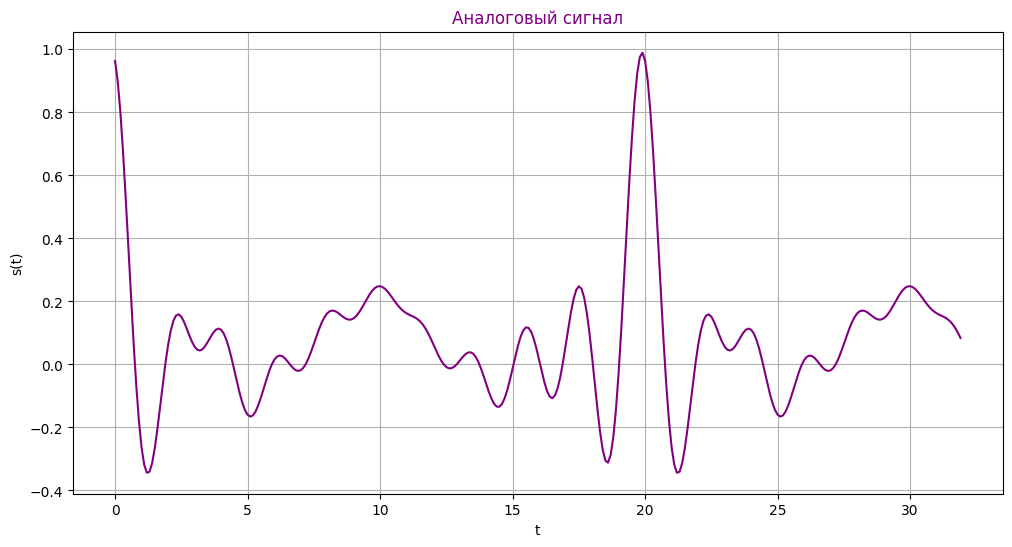

In [243]:
plt.figure(figsize=(12, 6))

plt.title('Аналоговый сигнал', color='Purple')
plt.plot(interval_analog, analog_signal, color='Purple')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)

plt.show()

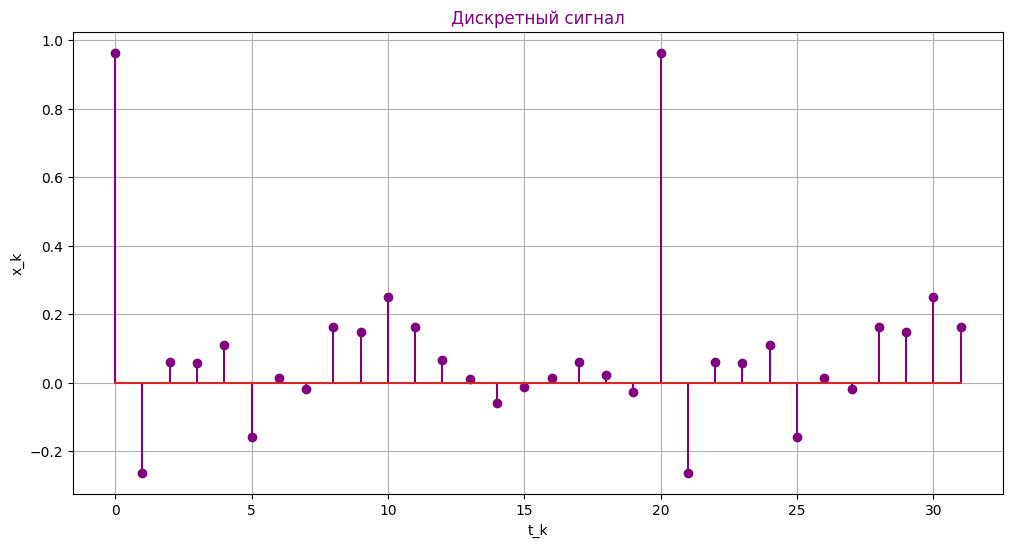

In [244]:
plt.figure(figsize=(12, 6))

plt.title('Дискретный сигнал', color='Purple')
plt.stem(interval_discrete, discrete_signal, 'Purple')
plt.xlabel('t_k')
plt.ylabel('x_k')
plt.grid(True)

plt.show()

**3.**  
$\quad$С помощью дискретного преобразования Фурье (ДПФ) найдены дискретные отсчеты спектра дискретного сигнала:

Представим дискретный сигнал в виде функции от времени:

$$s(t)=\sum_{k=0}^{31} x_k \delta(t-k)$$

Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2π$:

$$S(\omega)=\sum_{k=0}^{31}x_k e^{-i\omega k}$$

In [245]:
interval_omega = np.arange(-math.pi, math.pi+0.1*math.pi, 0.1*math.pi)

def S(w):
  S=0
  for k in range(0, 32):
    S += discrete_signal[k]*np.exp(-1j*w*k)
  return S

$\quad$Далее построен график, соответствующий составленным дискретным отсчетам спектра дискретного сигнала:

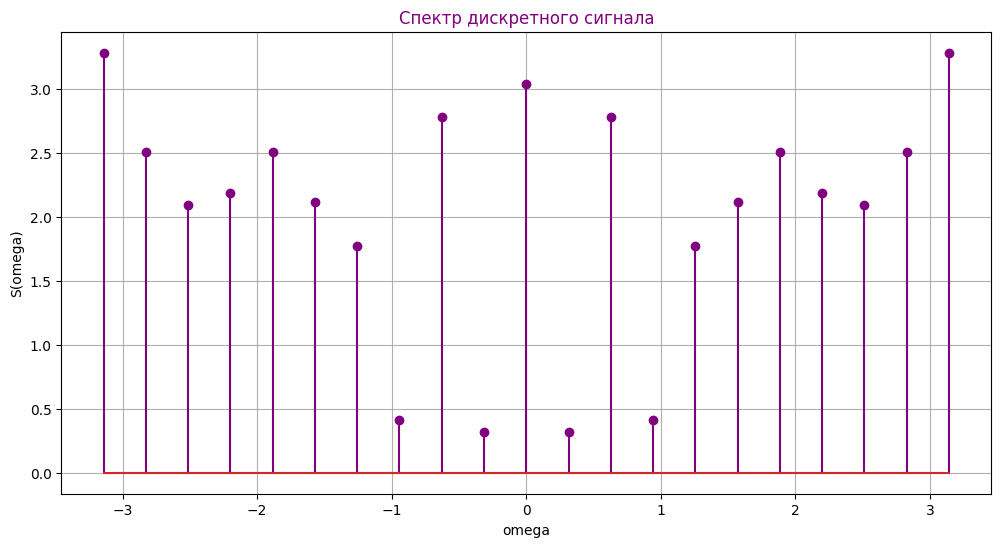

In [246]:
plt.figure(figsize=(12, 6))

plt.title('Спектр дискретного сигнала', color='Purple')
plt.stem(interval_omega, [np.abs(S(i)) for i in interval_omega], 'Purple')
plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.show()

**4.**  
$\quad$Для дискретного сигнала было применено линейное сглаживание по 5-ти и 9-ти точкам:  
*   По 5-ти точкам: $$y_k = \frac{x_{k-2}+x_{n-1}+x_{k}+x_{n+1}+x_{k+2}}{5}$$
*   По 9-ти точкам: $$y_k = \frac{x_{k-4}+x_{k-3}+x_{k-2}+x_{k-1}+x_{k}+x_{k+1}+x_{k+2}+x_{k+3}+x_{k+4}}{9}$$  

$\quad$Формулы для передаточной функции (частотной характеристики) фильтра $H(ω)$:  
*   По 5-ти точкам: $$H(\omega)=\frac{sin(\frac{5\omega}{2})}{5sin(\frac{\omega}{2})}$$
*   По 9-ти точкам: $$H(\omega)=\frac{sin(\frac{9\omega}{2})}{9sin(\frac{\omega}{2})}$$  

$\quad$Для крайних точек, которые не имеют допустимого (для сглаживания) числа соседей -- используются значения в данной точке. Пример крайней точки: $y_n= \frac{3x_k+x_{k-1}+x_{k-2}}{5}$




In [247]:
def smooth(m, parameters):
    y = []
    for i in range(0, len(discrete_signal)):
        y_tmp = []
        if (i < m):
            for j in range(-i, m+1):
                y_tmp.append(parameters[m+j]*discrete_signal[i+j])
            while (len(y_tmp) < 2 * m + 1):
                y_tmp.append(parameters[2*m+1-len(y_tmp)-1]*discrete_signal[i])
        else:
            if (len(discrete_signal) - i <= m):
                for j in range(-m, len(discrete_signal) - i):
                    y_tmp.append(parameters[m+j]*discrete_signal[i+j])
                while (len(y_tmp) < 2 * m + 1):
                    y_tmp.append(parameters[2*m+1-len(y_tmp)-1]*discrete_signal[i])
            else:
                for j in range(-m, m + 1):
                    y_tmp.append(parameters[m+j]*discrete_signal[i+j])

        y.append(sum(y_tmp) / sum(parameters))

    return y

parameters_5 = 5*[1]
parameters_9 = 9*[1]

filter_signal_5 = smooth(2, parameters_5)  #5
filter_signal_9 = smooth(4, parameters_9)  #9

**5.**  
$\quad$Визуализация полученных после фильтрации дискретных сигналов, совместно с исходным дискретным сигналом:

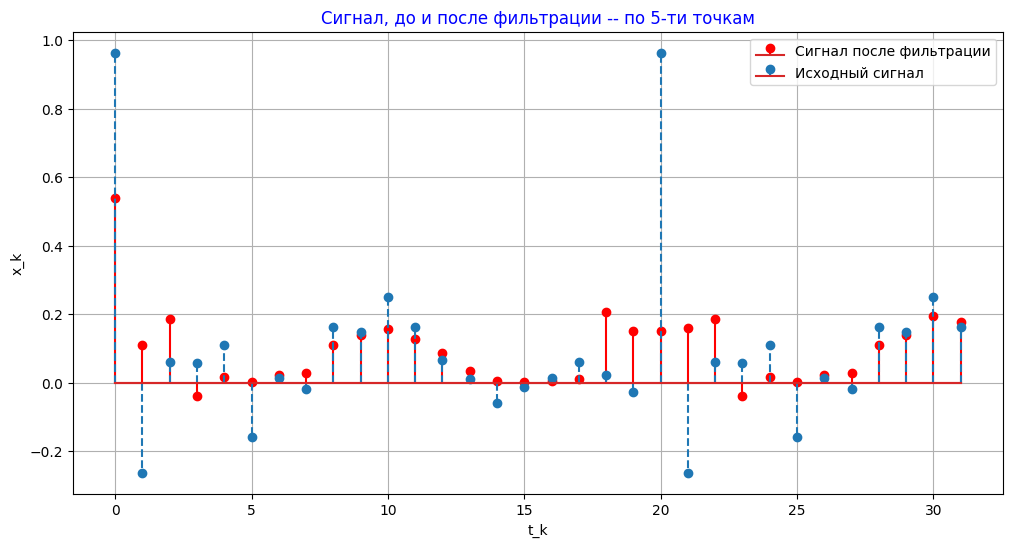

In [248]:
plt.figure(figsize=(12, 6))

plt.title('Сигнал, до и после фильтрации -- по 5-ти точкам', color='Blue')
plt.stem(interval_discrete, filter_signal_5, 'red', label='Cигнал после фильтрации')
plt.stem(interval_discrete, discrete_signal, linefmt='--', label='Исходный сигнал')

plt.xlabel('t_k')
plt.ylabel('x_k')
plt.grid(True)

plt.legend()
plt.show()

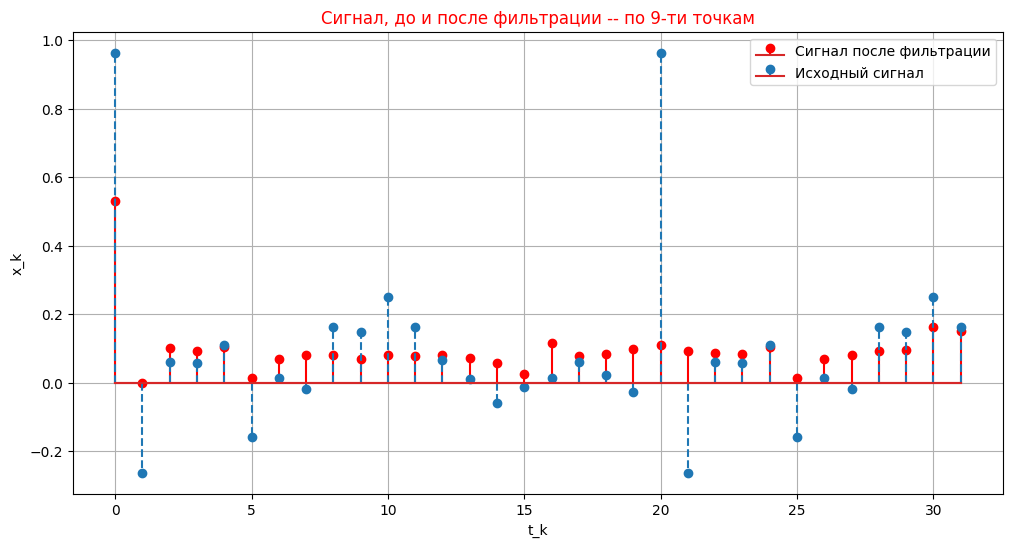

In [249]:
plt.figure(figsize=(12, 6))

plt.title('Сигнал, до и после фильтрации -- по 9-ти точкам', color='Red')
plt.stem(interval_discrete, filter_signal_9,'red', label='Cигнал после фильтрации')
plt.stem(interval_discrete, discrete_signal, linefmt='--', label='Исходный сигнал')

plt.xlabel('t_k')
plt.ylabel('x_k')
plt.grid(True)

plt.legend()
plt.show()

**6.**  
$\quad$С помощью дискретного преобразования Фурье (ДПФ) найдены дискретные отсчеты спектров дискретных сигналов после фильтрации:

Аналогично п. 3


In [250]:
def S2(w):
  S=0
  for k in range(0, 32):
    S += filter_signal_5[k]*np.exp(-1j*w*k)
  return S

def S3(w):
  S=0
  for k in range(0, 32):
    S += filter_signal_9[k]*np.exp(-1j*w*k)
  return S

$\quad$Графики, визуализирующие дискретные отсчеты спектра дискретного сигнала после его фильтрации, совместно с отсчетами спектра исходного сигнала:

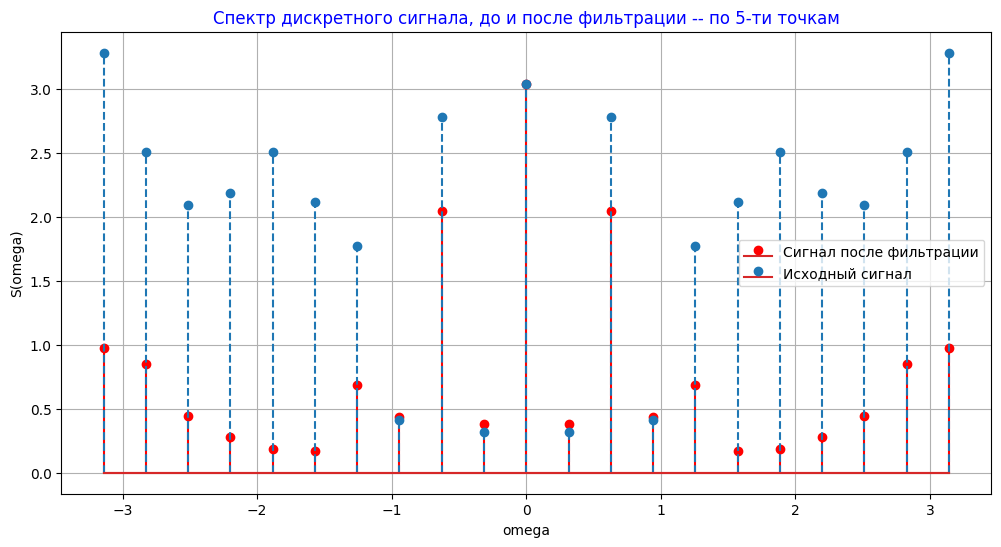

In [251]:
plt.figure(figsize=(12, 6))

plt.title('Спектр дискретного сигнала, до и после фильтрации -- по 5-ти точкам', color='Blue')
plt.stem(interval_omega, [np.abs(S2(i)) for i in interval_omega],'red',label='Cигнал после фильтрации')
plt.stem(interval_omega, [np.abs(S(i)) for i in interval_omega], linefmt='--', label='Исходный сигнал')

plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.legend()
plt.show()

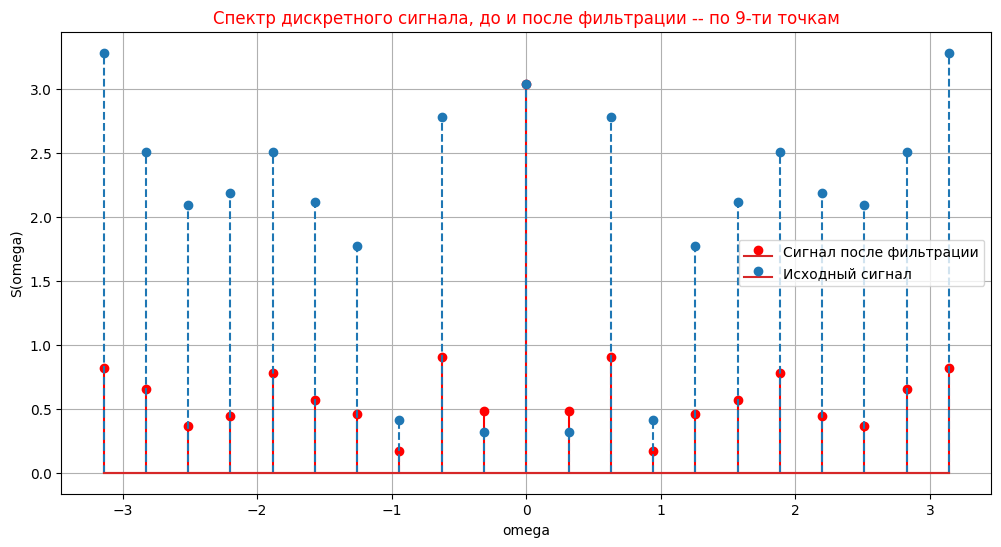

In [252]:
plt.figure(figsize=(12, 6))

plt.title('Спектр дискретного сигнала, до и после фильтрации -- по 9-ти точкам', color='Red')
plt.stem(interval_omega, [np.abs(S3(i)) for i in interval_omega],'red', label='Cигнал после фильтрации')
plt.stem(interval_omega, [np.abs(S(i)) for i in interval_omega], linefmt='--', label='Исходный сигнал')

plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.legend()
plt.show()

**7.**  
$\quad$Анализ результатов на соответствие значениям $H(ω)$:
*   Основываясь на визуальной оценке -- можно заметить, что вид графиков спектра дискретного сигнала при сглаживании по 5-ти и 9-ти точкам повторяет контур $H(ω)$ при сглаживании по соответствующему числу точек.
* Также по графикам можно сделать вывод о том, что в точке 0 расположена полоса пропускания сигнала без искажений, но с ростом $ω$ - подавление принимает вид затухающей косинусоиды (уменьшается амплитуда), что соответвествует графику $H(ω)$ при сглаживании сигнала.
* Из расположения точек на графиках можно судить о том, что с увеличением числа точек при сглаживании увеличивается крутизна спада в районе $\omega=0$.

**8.**  
$\quad$Следом, выполены действия п. 4–7 для:   
$\quad\quad$a. Сглаживания полиномом 2-ой степени по 5 и 9 узлам.    
$\quad\quad$b. Сглаживания полиномом 4-ой степени по 7 и 11 узлам.    

**8a.4**  
$\quad$Линейное сглаживание полинономом 2-ой степени по 5-ти и 9-ти точкам:
*   По 5-ти точкам: $$y_k = \frac{-3x_{k-2} + 12x_{k-1} + 17x_{k} +12x_{k+1} - 3x_{k+2}}{35}$$
*   По 9-ти точкам: $$y_k = \frac{-21x_{k-4}+14x_{k-3}+39x_{k-2}+54x_{k-1}+59x_{k}+54x_{k+1}+39x_{k+2}+14x_{k+3}-21x_{k+4}}{231}$$  

$\quad$Формулы для передаточной функции (частотной характеристики) фильтра $H(ω)$:  
*   По 5-ти точкам: $$H(\omega) = \frac{17 + 24\cos\omega - 6\cos{2\omega}}{35}$$
*   По 9-ти точкам: $$H(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$$  

$\quad$Обработка крайних точек - аналогично п.4.

In [253]:
parameters_2_5 = [-3, 12, 17, 12, -3]
parameters_2_9 = [-21, 14, 39, 54, 59, 54, 39, 14, -21]

filter_signal_2_5 = smooth(2, parameters_2_5)  #5
filter_signal_2_9 = smooth(4, parameters_2_9)  #9

**8a.5**  
$\quad$Построены графики, визуализирующие полученные после фильтрации дискретные сигналы, совместно с исходным дискретным сигналом:

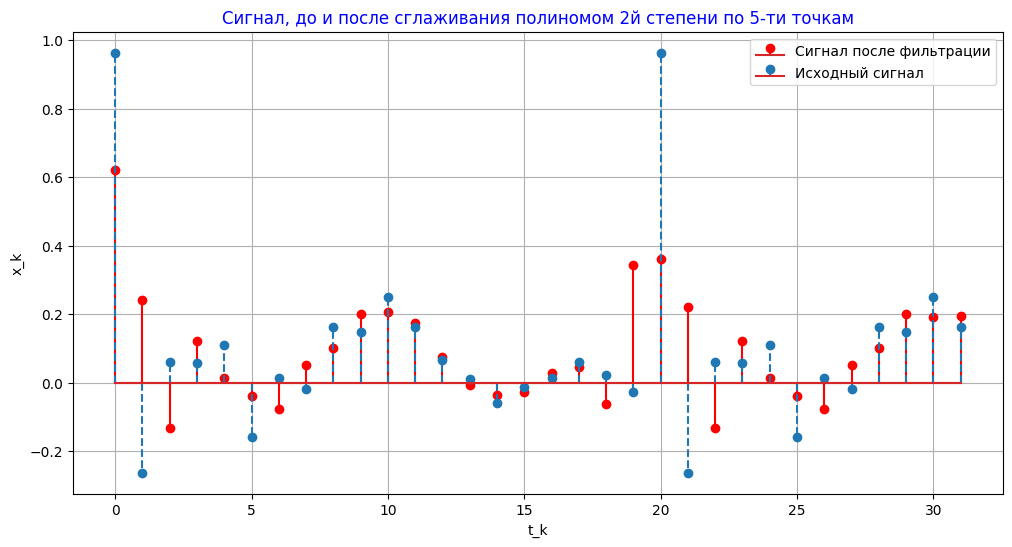

In [254]:
plt.figure(figsize=(12, 6))

plt.title('Сигнал, до и после сглаживания полиномом 2й степени по 5-ти точкам', color='Blue')
plt.stem(interval_discrete, filter_signal_2_5, 'red', label='Cигнал после фильтрации')
plt.stem(interval_discrete, discrete_signal, linefmt='--', label='Исходный сигнал')

plt.xlabel('t_k')
plt.ylabel('x_k')
plt.grid(True)

plt.legend()
plt.show()

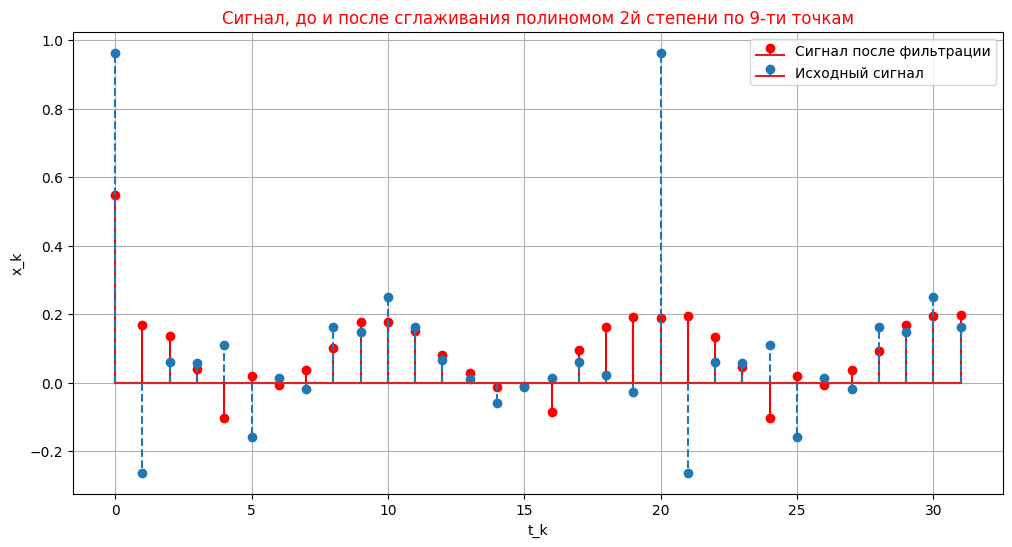

In [255]:
plt.figure(figsize=(12, 6))

plt.title('Сигнал, до и после сглаживания полиномом 2й степени по 9-ти точкам', color='Red')
plt.stem(interval_discrete, filter_signal_2_9, 'red', label='Cигнал после фильтрации')
plt.stem(interval_discrete, discrete_signal, linefmt='--', label='Исходный сигнал')

plt.xlabel('t_k')
plt.ylabel('x_k')
plt.grid(True)

plt.legend()
plt.show()

**8a.6**  
$\quad$Посредством ДПФ были найдены дискретные отсчеты спектров дискретных сигналов после их фильтрации:

Аналогично п.3

In [256]:
def S4(w):
  S=0
  for k in range(0, 32):
    S += filter_signal_2_5[k]*np.exp(-1j*w*k)
  return S

def S5(w):
  S=0
  for k in range(0, 32):
    S += filter_signal_2_9[k]*np.exp(-1j*w*k)
  return S

$\quad$Визуализация дискретных отсчетов спектров дискретных сигналов после их фильтрации, совместно с отсчетами спектра исходного сигнала:

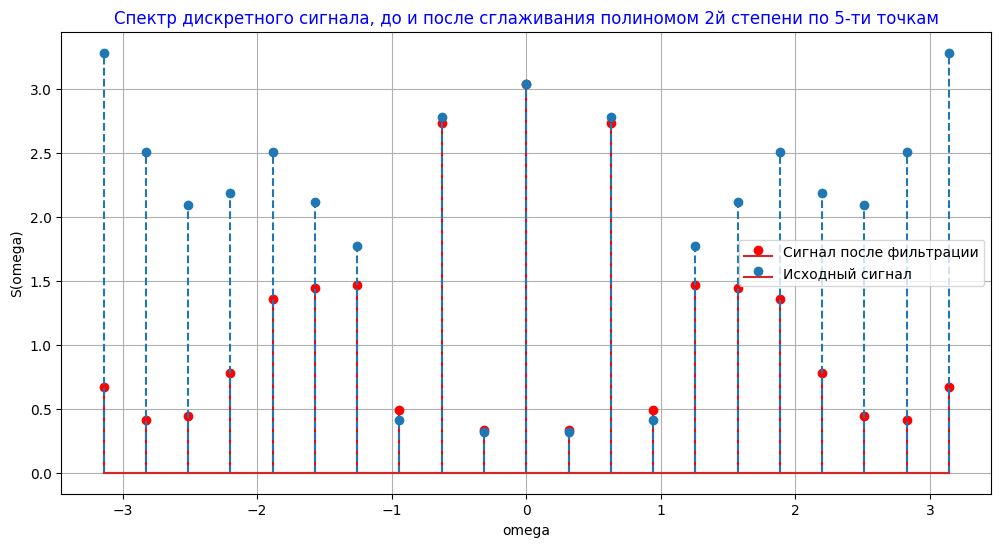

In [257]:
plt.figure(figsize=(12, 6))

plt.title('Спектр дискретного сигнала, до и после сглаживания полиномом 2й степени по 5-ти точкам', color='Blue')
plt.stem(interval_omega, [np.abs(S4(i)) for i in interval_omega], 'red', label='Cигнал после фильтрации')
plt.stem(interval_omega, [np.abs(S(i)) for i in interval_omega], linefmt='--', label='Исходный сигнал')

plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.legend()
plt.show()

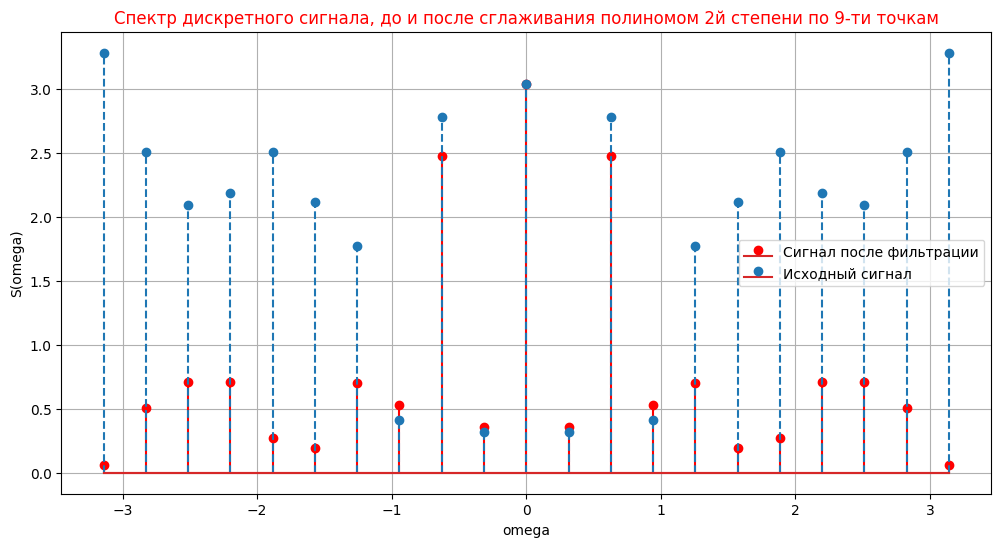

In [258]:
plt.figure(figsize=(12, 6))

plt.title('Спектр дискретного сигнала, до и после сглаживания полиномом 2й степени по 9-ти точкам', color='Red')
plt.stem(interval_omega, [np.abs(S5(i)) for i in interval_omega], 'red', label='Cигнал после фильтрации')
plt.stem(interval_omega, [np.abs(S(i)) for i in interval_omega], linefmt='--', label='Исходный сигнал')

plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.legend()
plt.show()

**8a.7**  
$\quad$Анализ результатов на соответствие значениям $H(ω)$:
* Вид графиков спектра дискретного сигнала при сглаживании полиномом второй степени по 5-ти и 9-ти точкам повторяет контур $H(ω)$ при сглаживании по соответствующему числу точек.
* Исходя из графиков -- ширина полосы пропускания увеличилась по сравнению с графиком линейного сглаживания.
* Также, по расположению точек можно сделать вывод о том, что с увеличением числа точек при сглаживании увеличивается крутизна спада в районе $\omega=0$.


**8b.4**  
$\quad$Линейное сглаживание полинономом 4-ой степени по 7-ти и 11-ти точкам:
*   По 7-ти точкам: $$y_k = \frac{5x_{k-3} - 30x_{k-2} + 75x_{k-1} + 131x_k + 75x_{k+1} - 30x_{k+2} + 5x_{k+3}}{231}$$
*   По 11-ти точкам: $$y_k=\frac{18x_{k-5}-45x_{k-4}-10x_{k-3}+60x_{k-2}+120x_{k-1}+143x_{k}+120x_{k+1}+60x_{k+2}-10x_{k+3}-45x_{k+4}+18x_{k+5}}{429}$$

$\quad$Передаточной функция $H(ω)$:  
*   По 7-ти точкам: $$H(\omega) = \frac{131 + 150cos(\omega) - 60cos(2\omega) + 10cos(3\omega)}{231}$$
*   По 11-ти точкам: $$H(\omega) = \frac{143 + 240cos(\omega) + 120 cos(2\omega) - 20 cos(3\omega) - 90cos(4\omega) + 36cos(5\omega)}{429}$$  

$\quad$Обработка крайних точек - аналогично п.4.

In [259]:
parameters_4_7 = [5, -30, 75, 131, 75, -30, 5]
parameters_4_11 = [18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]

filter_signal_4_7 = smooth(3, parameters_4_7)  #7
filter_signal_4_11 = smooth(5, parameters_4_11)  #11

**8b.5**  
$\quad$Визуализиция полученных после фильтрации дискретных сигналов совместно с исходным:

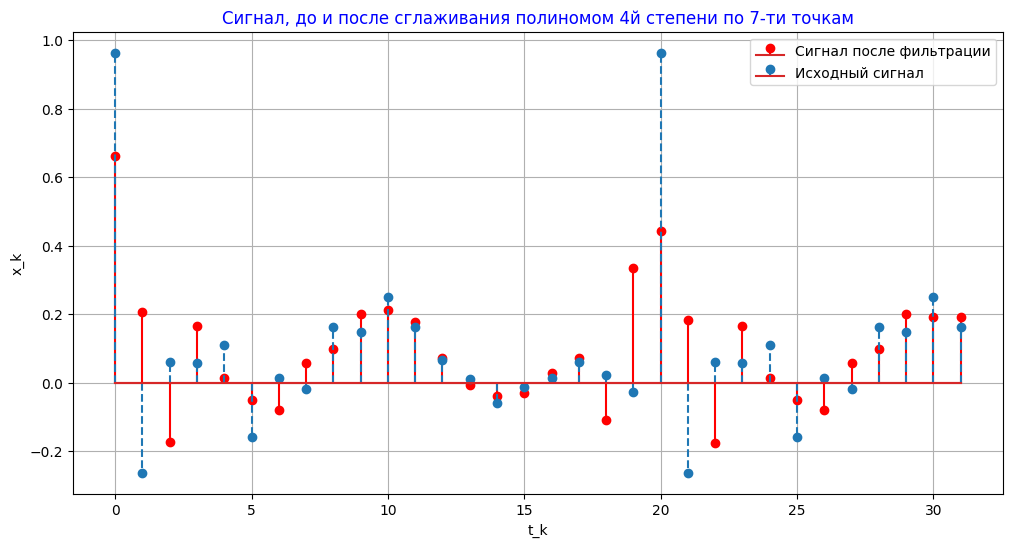

In [260]:
plt.figure(figsize=(12, 6))

plt.title('Сигнал, до и после сглаживания полиномом 4й степени по 7-ти точкам', color='Blue')
plt.stem(interval_discrete, filter_signal_4_7, 'red', label='Cигнал после фильтрации')
plt.stem(interval_discrete, discrete_signal, linefmt='--', label='Исходный сигнал')

plt.xlabel('t_k')
plt.ylabel('x_k')
plt.grid(True)

plt.legend()
plt.show()

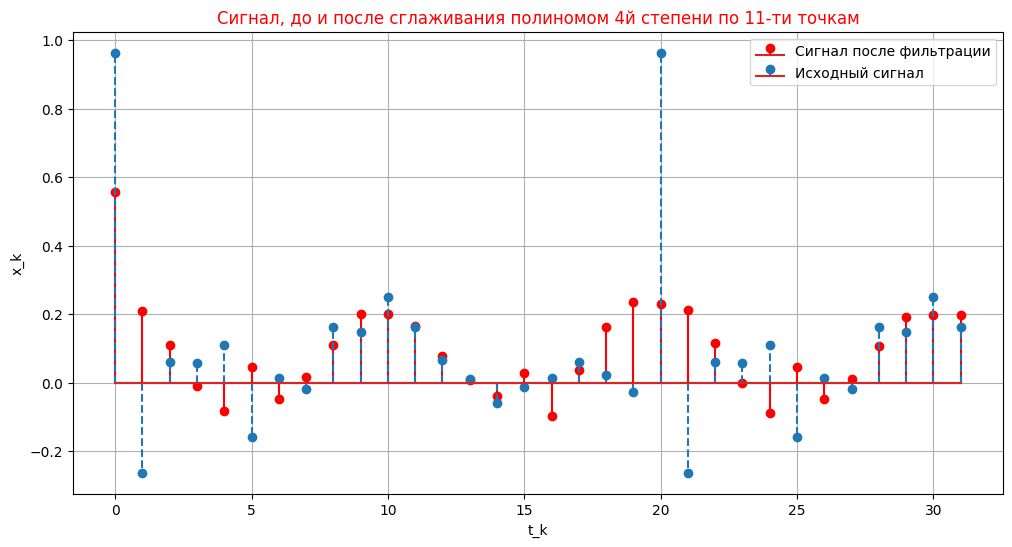

In [261]:
plt.figure(figsize=(12, 6))

plt.title('Сигнал, до и после сглаживания полиномом 4й степени по 11-ти точкам', color='Red')
plt.stem(interval_discrete, filter_signal_4_11, 'red', label='Cигнал после фильтрации')
plt.stem(interval_discrete, discrete_signal, linefmt='--', label='Исходный сигнал')

plt.xlabel('t_k')
plt.ylabel('x_k')
plt.grid(True)

plt.legend()
plt.show()

**8b.6**  
$\quad$С помощью дискретного преобразования Фурье найдены дискретные отсчеты спектров дискретных сигналов после фильтрации:

Аналогично п. 3

In [262]:
def S6(w):
  S=0
  for k in range(0, 32):
    S += filter_signal_4_7[k]*np.exp(-1j*w*k)
  return S

def S7(w):
  S=0
  for k in range(0, 32):
    S += filter_signal_4_11[k]*np.exp(-1j*w*k)
  return S

$\quad$Графики, визуализирующие дискретные отсчеты спектров дискретных сигналов после фильтрации, совместно с отсчетами спектра исходного сигнала:

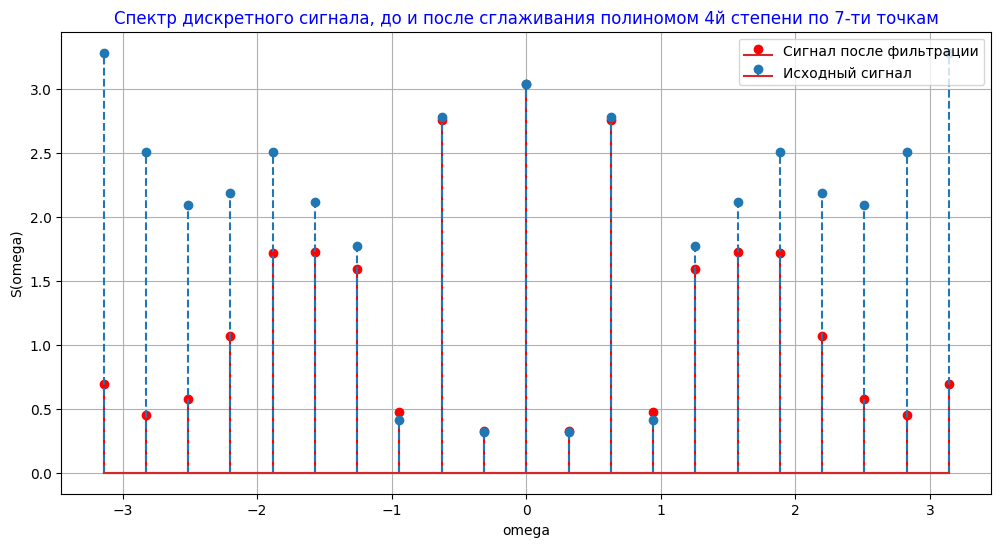

In [263]:
plt.figure(figsize=(12, 6))

plt.title('Спектр дискретного сигнала, до и после сглаживания полиномом 4й степени по 7-ти точкам', color='Blue')
plt.stem(interval_omega, [np.abs(S6(i)) for i in interval_omega], 'red', label='Cигнал после фильтрации')
plt.stem(interval_omega, [np.abs(S(i)) for i in interval_omega], linefmt='--', label='Исходный сигнал')

plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.legend()
plt.show()

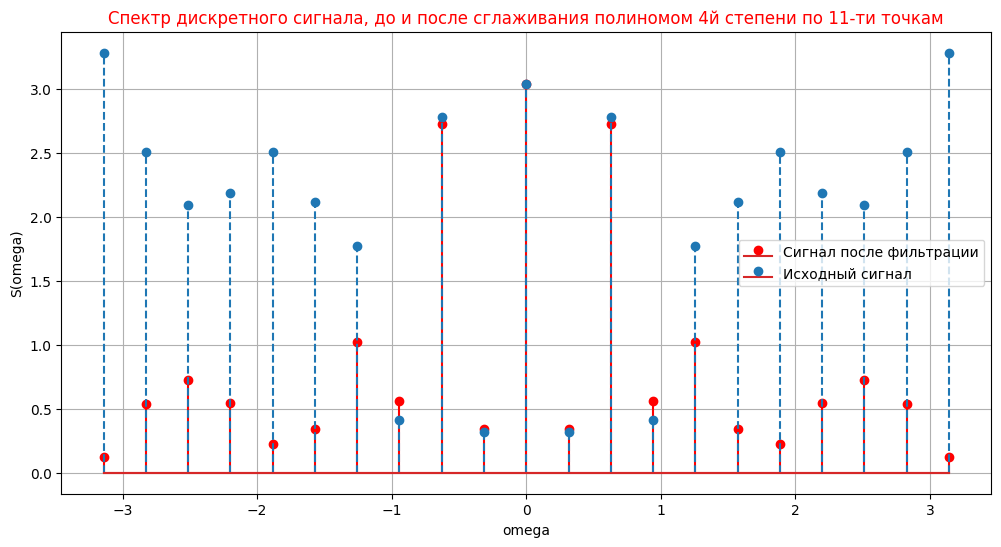

In [264]:
plt.figure(figsize=(12, 6))

plt.title('Спектр дискретного сигнала, до и после сглаживания полиномом 4й степени по 11-ти точкам', color='Red')
plt.stem(interval_omega, [np.abs(S7(i)) for i in interval_omega], 'red', label='Cигнал после фильтрации')
plt.stem(interval_omega, [np.abs(S(i)) for i in interval_omega], linefmt='--', label='Исходный сигнал')

plt.xlabel('omega')
plt.ylabel('S(omega)')
plt.grid(True)

plt.legend()
plt.show()

**8b.7**  
$\quad$Анализ результатов на соответствие значениям $H(ω)$:
* Вид графиков спектра дискретного сигнала при сглаживании полиномом четвёртой степени по 7-ти и 11-ти точкам повторяет контур $H(ω)$ при сглаживании по соответствующему числу точек.
* Исходя из графиков -- ширина полосы пропускания увеличилась по сравнению с графиками сглаживания полиномом второй степени и линейным.
* Также, по расположению точек можно сделать вывод о том, что с увеличением числа точек при сглаживании увеличивается крутизна спада в районе $\omega=0$.

**9**  
$\quad$Интерпретация результатов выполнения практической работы:
* Анализ результатов в пункте 7, пункте 8а.7 и пункте 8b.7 -- наглядно демонстрирует то, что фильтры сглаживания имеют схожий между собой эффект, но в зависимости от степени сглаживающего полинома и количество точек, по которым проводится сглаживание, выходной сигнал приобретает различные характеристики (длину полосы пропускания без искажения, крутизну спада в районе низких частот).
* Операция сглаживания позволяет нивилировать резкие перепады частот в исходном сигнале.
* Характеристики полученных после фильтрации сигналов соответствуют свойствам передаточных функций, рассмотренных в практической работе №3: Частотный анализ полиномиальных приближений.

## Выводы

$\quad$В ходе выполнения практической работы были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

$\quad$Сформирован дискретный сигнал посредством дискретизации непрерывного сигнала, представляющий собой линейную комбинацию косинусоид; Построены графики, визуализирующие исходный аналоговый и дискретизированный сигналы; Также при помощи ДПФ были найдены и визуализированы дискретные отсчеты спектра дискретного сигнала; Для дискретного сигнала применено линейное сглаживание по 5-ти и 9-ти точкам и представлены формулы для передаточных функций фильтра $H(ω)$, полученные после фильтрации дискретные сигналы, совместно с исходным дискретным сигналом, были представены на графиках; Далее - c помощью ДПФ найдены и визуализированы дискретные отсчеты спектра дискретного сигнала до и после его фильтрации; Сделаны выводы о соответствие результатов значениям $H(ω)$.  
$\quad$Аналогично был проведён анализ для сглаживаний полиномом 2-ой степени по 5 и 9 узлам и полиномом 4-ой степени по 7 и 11 узлам.  
$\quad$В завершении работы -- сделаны выводы об общей природе сглаживания.